In [2]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [3]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
sys.path.append(git_path+"/docs/inputs/shared-pyplot-files/")
from pyplot_parameters import colors, complete_panel, save_figure, set_boundaries, \
                              add_subplotlabels # set_boundaries
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[2][-1]
tutorial_name = path_in_folder.split("/")[3]
path_figures = "/docs/sphinx/source/tutorials/figures/level" + level + "/" + tutorial_name + "/"
print("level:" , level, "& tutorial name:", tutorial_name)
print("figures will be saved in", path_figures)

level: 2 & tutorial name: nanosheared-electrolyte
figures will be saved in /docs/sphinx/source/tutorials/figures/level2/nanosheared-electrolyte/


In [4]:
_, z, _, density_water, velocity_water = np.loadtxt("water.profile_1A.dat", skiprows=4).T
_, z, _, density_solid, velocity_solid = np.loadtxt("wall.profile_1A.dat", skiprows=4).T
_, z, _, density_ions, velocity_ions = np.loadtxt("ions.profile_1A.dat", skiprows=4).T
z /= 10 # nm
velocity_water *= 1e5 # m/s
velocity_solid *= 1e5 # m/s
velocity_ions *= 1e5 # m/s

### Stokes equation

$\eta \nabla \textbf{v} = - \textbf {f}$

By symmetry:

$\eta \partial^2 v = - f$

After integration:

$v = - \dfrac{f}{\eta} \left( \dfrac{z^2}{2} - \dfrac{h^2}{8} \right)$

### Prefactor

Force per volume of fluid (assuming bulk water density):

$F_\rho = f \rho = 0.03\,\text{kcal/mol/\AA} \times 55555 \,\text{mol/m}^3 = 1.15 \text{e}-7\,\text{mol N / m}^3$

Estimated viscosity (assuming bulk water):

$\eta = 0.001\,\text{Pa s}$

$f / \eta = 6.9 \text{e}19\,/\text{m}/\text{s}$

In [5]:
hs = 1.2e-9 # m
zs = np.arange(-hs/2, hs/2, hs/1000) # m
vs = - 6.9e19*(zs**2/2-hs**2/8)

alpha = 0.78

vs *= alpha

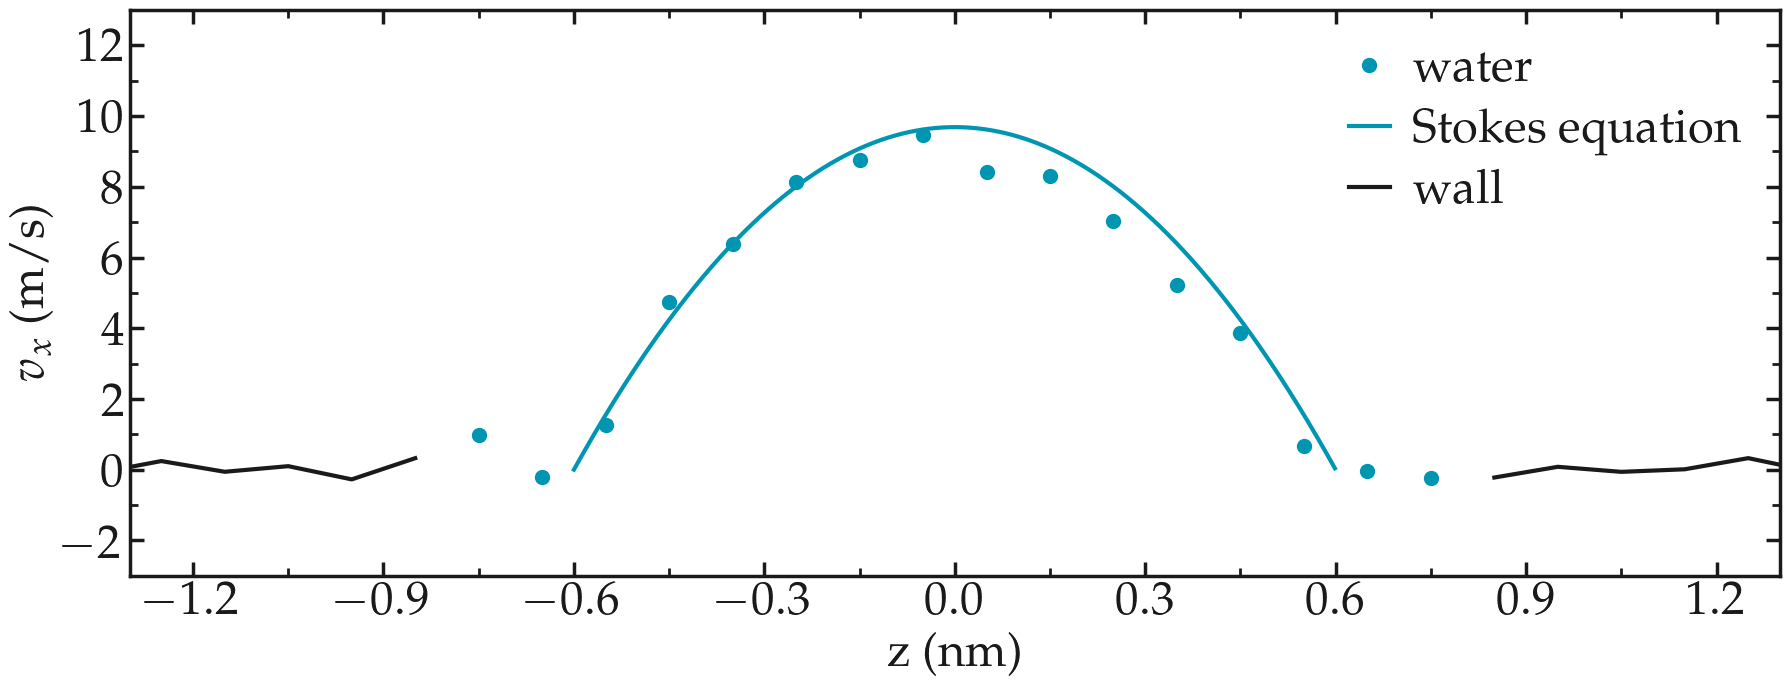

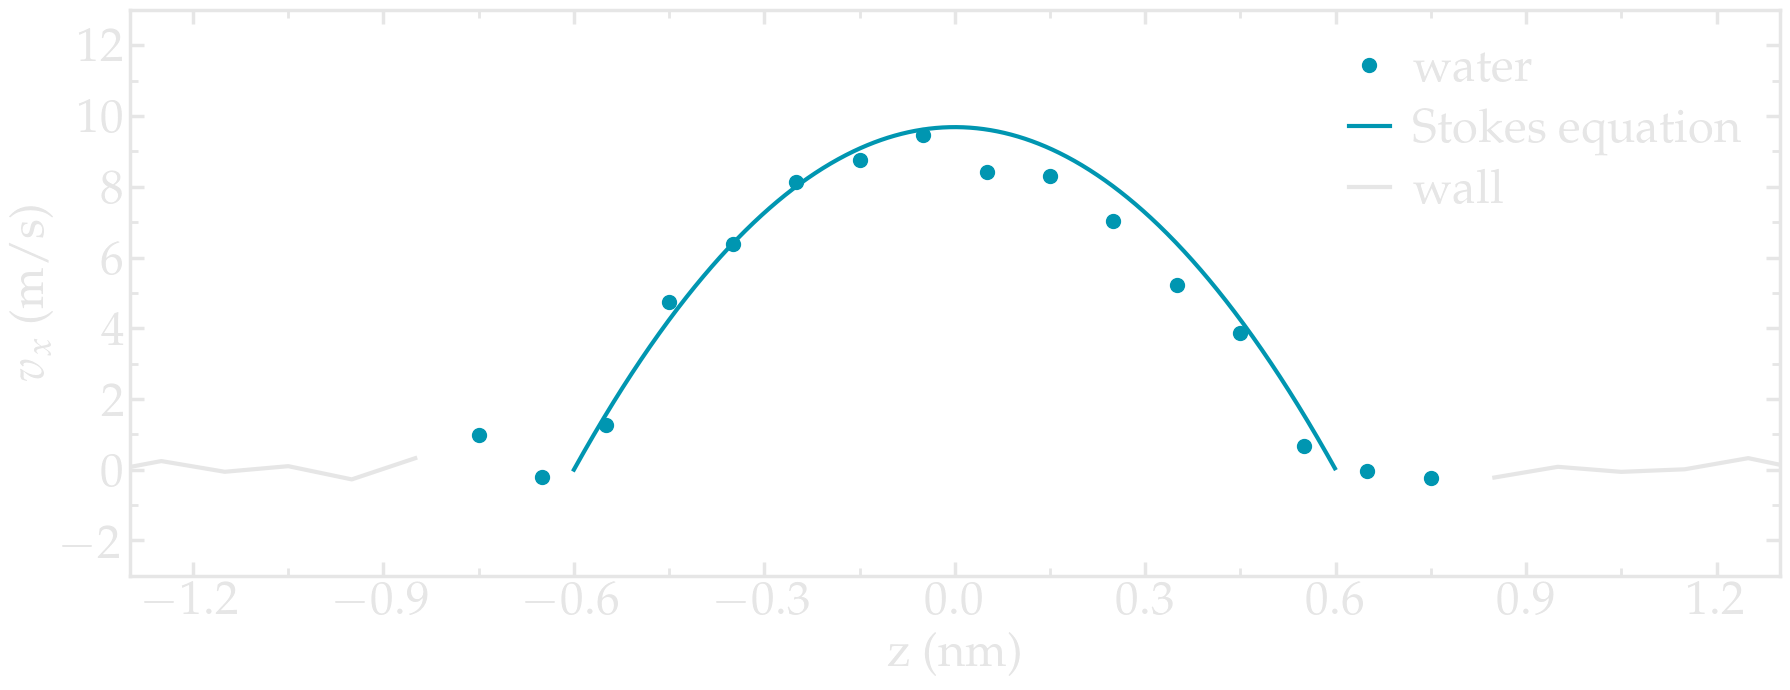

In [10]:
filename = "shearing-poiseuille"
for mode, mygray in zip(['light', 'dark'], [colors["lightgray"], colors["darkgray"]]):    
    fig = plt.figure(figsize=(18,7))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(z[density_water>0.02], velocity_water[density_water>0.02], 'o', color=colors["myblue"], markersize=10, label=r'water')
    ax[-1].plot(zs*1e9, vs, '-', color=colors["myblue"], linewidth=3, label=r'Stokes equation')
    #ax[-1].plot(z[density_ions>0.02], velocity_ions[density_ions>0.02], 's', color=colors["myorange"], markersize=10, label=r'ions')
    ax[-1].plot(z[(density_solid>0) & (z<0)], velocity_solid[(density_solid>0) & (z<0)], color=mygray, linewidth=3, label=r'wall')
    ax[-1].plot(z[(density_solid>0) & (z>0)], velocity_solid[(density_solid>0) & (z>0)], color=mygray, linewidth=3)
    complete_panel(ax[-1], r'z (nm)', r'$v_x$ (m/s)', legend=True, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(-1.2, 1.3, 0.3), x_boundaries=(-1.3, 1.3),
                   y_ticks=np.arange(-2, 14, 2), y_boundaries=(-3, 13))
    #add_subplotlabels(fig, ax, ["a", "b"], color=mygray)
    save_figure(fig, mode, git_path, path_figures, filename)

In [7]:
zs*1e-9

array([-6.00000000e-19, -5.98800000e-19, -5.97600000e-19, -5.96400000e-19,
       -5.95200000e-19, -5.94000000e-19, -5.92800000e-19, -5.91600000e-19,
       -5.90400000e-19, -5.89200000e-19, -5.88000000e-19, -5.86800000e-19,
       -5.85600000e-19, -5.84400000e-19, -5.83200000e-19, -5.82000000e-19,
       -5.80800000e-19, -5.79600000e-19, -5.78400000e-19, -5.77200000e-19,
       -5.76000000e-19, -5.74800000e-19, -5.73600000e-19, -5.72400000e-19,
       -5.71200000e-19, -5.70000000e-19, -5.68800000e-19, -5.67600000e-19,
       -5.66400000e-19, -5.65200000e-19, -5.64000000e-19, -5.62800000e-19,
       -5.61600000e-19, -5.60400000e-19, -5.59200000e-19, -5.58000000e-19,
       -5.56800000e-19, -5.55600000e-19, -5.54400000e-19, -5.53200000e-19,
       -5.52000000e-19, -5.50800000e-19, -5.49600000e-19, -5.48400000e-19,
       -5.47200000e-19, -5.46000000e-19, -5.44800000e-19, -5.43600000e-19,
       -5.42400000e-19, -5.41200000e-19, -5.40000000e-19, -5.38800000e-19,
       -5.37600000e-19, -